In [1]:
import json
import re
import enchant
import pandas as pd
import numpy as np
d = enchant.Dict("en_US")

In [2]:
doc_a = json.load(open('PaperA.json','r', encoding='utf-8'))
doc_b = json.load(open('PaperB.json','r', encoding='utf-8'))
doc_c = json.load(open('PaperC.json','r', encoding='utf-8'))
doc_d = json.load(open('PaperD.json','r', encoding='utf-8'))
doc_e = json.load(open('PaperE.json','r', encoding='utf-8'))

In [3]:
def is_english(char: str) -> bool:
    pattern = re.compile(r'[a-zA-Z]')
    check = pattern.search(char)
    if check:
        return True
    else:
        return False

def is_full_eng(text: str) -> str:
    for c in text:
        if not is_english(c):
            return False
    return True

In [4]:
clean_a = []
for word in doc_a['words'][0:50]: #get more import word
    if d.check(word) and is_full_eng(word) and len(word) > 3:
        clean_a.append(word)

clean_b = []
for word in doc_b['words'][0:50]:
    if d.check(word) and is_full_eng(word) and len(word) > 3:
        clean_b.append(word)

clean_c = []
for word in doc_c['words'][0:50]:
    if d.check(word)and is_full_eng(word) and len(word) > 3:
        clean_c.append(word)
        
clean_d = []
for word in doc_d['words'][0:50]:
    if d.check(word)and is_full_eng(word) and len(word) > 3:
        clean_d.append(word)
        
clean_e = []
for word in doc_e['words'][0:50]:
    if d.check(word)and is_full_eng(word) and len(word) > 3:
        clean_e.append(word)

In [5]:
clean_a.extend(clean_b)
clean_a.extend(clean_c)
clean_a.extend(clean_d)
clean_a.extend(clean_e)

In [6]:
clean_a = sorted(list(set(clean_a)))

In [7]:
df = pd.DataFrame(columns=clean_a)
df

,ARTICLE,Agriculture,Analysis,Antonio,Article,Austria,Biology,Body,Christine,College,...,images,index,info,journal,lists,mass,metric,prediction,technologies,visual


In [8]:
terms_a = []
for i in clean_a:
    if i in doc_a['words']:
        terms_a.append(1)
    else:
        terms_a.append(0)
df.loc['Doc_A'] = terms_a

terms_b = []
for i in clean_a:
    if i in doc_b['words']:
        terms_b.append(1)
    else:
        terms_b.append(0)
df.loc['Doc_B'] = terms_b

terms_c = []
for i in clean_a:
    if i in doc_c['words']:
        terms_c.append(1)
    else:
        terms_c.append(0)
df.loc['Doc_C'] = terms_c

terms_d = []
for i in clean_a:
    if i in doc_d['words']:
        terms_d.append(1)
    else:
        terms_d.append(0)
df.loc['Doc_D'] = terms_d

terms_e = []
for i in clean_a:
    if i in doc_d['words']:
        terms_e.append(1)
    else:
        terms_e.append(0)
df.loc['Doc_E'] = terms_e

In [9]:
cocc = []
df

,ARTICLE,Agriculture,Analysis,Antonio,Article,Austria,Biology,Body,Christine,College,...,images,index,info,journal,lists,mass,metric,prediction,technologies,visual
Doc_A,0,0,0,0,1,0,0,1,0,0,...,1,1,1,0,1,1,0,1,0,1
Doc_B,1,0,1,0,0,1,1,1,1,0,...,1,1,0,1,0,1,1,1,0,0
Doc_C,1,0,1,0,1,0,0,0,0,0,...,1,1,0,1,1,1,0,1,0,1
Doc_D,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,1,0,1
Doc_E,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,1,0,1


In [10]:
for col_name in df.keys():
    print('填寫中 - {}'.format(col_name))
    result = []
    for col_order in range(len(df.columns)):
        if col_name == df.columns[col_order]:
#             print('跳過')
#             print()
            result.append(0)
        else:
            
            count = 0
            for row_count in range(len(df)):
                base = df.iloc[row_count, df.columns.get_loc(col_name)]
                target = df.iloc[row_count, col_order]
                
                if base==1 and target==1:
                    count += 1
            
            result.append(count)
                
            
    cocc.append(result)

填寫中 - ARTICLE
填寫中 - Agriculture
填寫中 - Analysis
填寫中 - Antonio
填寫中 - Article
填寫中 - Austria
填寫中 - Biology
填寫中 - Body
填寫中 - Christine
填寫中 - College
填寫中 - Computer
填寫中 - Computing
填寫中 - Contents
填寫中 - Davis
填寫中 - Department
填寫中 - Detecting
填寫中 - Direct
填寫中 - Electrical
填寫中 - Engineering
填寫中 - Face
填寫中 - Facial
填寫中 - Female
填寫中 - Geometric
填寫中 - Image
填寫中 - Index
填寫中 - Infer
填寫中 - Intervention
填寫中 - Javier
填寫中 - Lane
填寫中 - Lifestyle
填寫中 - Mass
填寫中 - Mayer
填寫中 - Melissa
填寫中 - Morph
填寫中 - Natural
填寫中 - Northeastern
填寫中 - Photograph
填寫中 - RESEARCH
填寫中 - Received
填寫中 - Reflected
填寫中 - Resources
填寫中 - Sarah
填寫中 - Science
填寫中 - Shang
填寫中 - Shape
填寫中 - Social
填寫中 - Sonja
填寫中 - States
填寫中 - Texture
填寫中 - Theoretical
填寫中 - United
填寫中 - University
填寫中 - Using
填寫中 - Vienna
填寫中 - Virginia
填寫中 - Vision
填寫中 - Weber
填寫中 - West
填寫中 - Wind
填寫中 - abstract
填寫中 - analysis
填寫中 - approach
填寫中 - article
填寫中 - available
填寫中 - body
填寫中 - computational
填寫中 - face
填寫中 - facial
填寫中 - from
填寫中 - history
填寫中 - images
填寫中

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import codecs

In [12]:
co_x = pd.DataFrame(columns=clean_a)

In [13]:
for d, col in zip(cocc, co_x.keys()):
    co_x.loc[col] = d

In [14]:
weight = []
for index, col in enumerate(co_x.keys()):
    temp = co_x.iloc[index]
    
    for i, c in enumerate(temp.index):
        if temp[c] > 3:
            weight.append((col, c, temp[c]))
    

In [15]:
from matplotlib import pyplot as plt
import networkx as nx

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


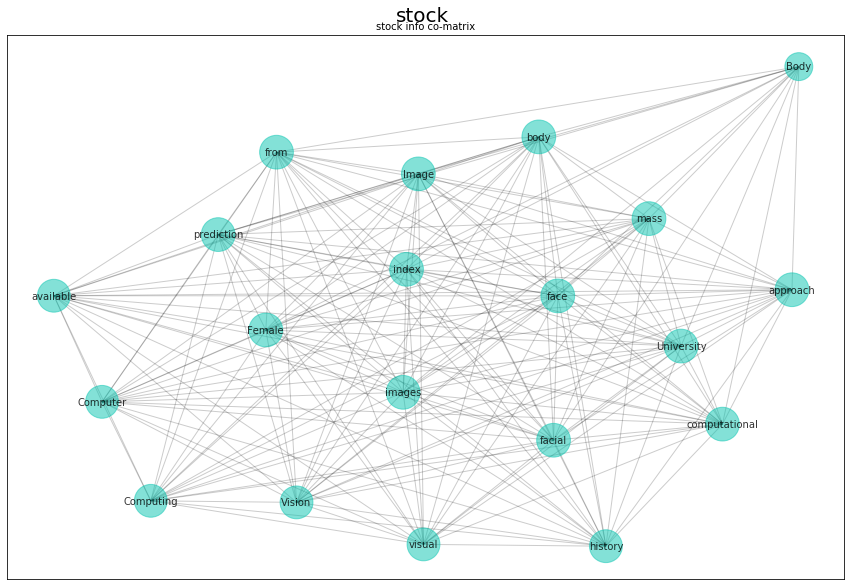

In [16]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(weight)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.5,node_size=[val*60 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
# for p in pos:  # raise text positions
#     pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
plt.title('stock info co-matrix', size = 10)
plt.suptitle('stock',x = 0.51,y=0.92, fontsize=20)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

In [17]:
import seaborn as sns

In [18]:
co_x = co_x.fillna(0)

Text(0.435, 0.95, 'feature heat map')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


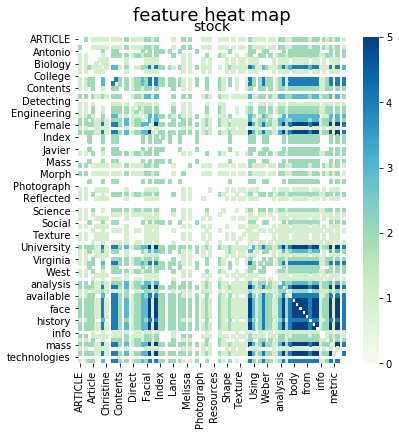

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(co_x, mask=co_x < 1,cmap='GnBu')
plt.title('stock', size = 14)
plt.suptitle('feature heat map',x = 0.435,y=0.95, fontsize=18)